1.关于数据集

In [1]:
from sklearn import datasets
iris=datasets.load_iris()
digits=datasets.load_digits()
print(digits.data)#获得数据的自变量
digits.target#获得数组型响应变量
digits.images[0]#对应着data中的数据，每一个元素都是8*8的二维数组，其元素代表的是灰度值。

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

sklearn 有自带的数据集，类似与字典

In [2]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(3,3))
plt.imshow(digits.images[-1],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

<Figure size 300x300 with 1 Axes>

In [3]:
digits.images.shape
data=digits.images.reshape((digits.images.shape[0],-1))#1797,64

当实例化估计器时，可以直接设置参数：estimator = Estimator(param1=1, param2=2)；

也可以以修改的方式进行：estimator.param1

当数据配有估计器时，参数将根据数据进行估计。 所有估计的参数都是估计对象的属性，以下划线结尾.
'estimator.estimated\_param\_'

2.关于估计器

In [4]:
from sklearn import svm
clf=svm.SVC(gamma=0.001,C=100.)#svm.SVM选择估计器
clf.fit(digits.data[:-1],digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

3.交叉验证通过score选择最优参数

给定一个估算器，交叉验证对象和输入数据集，cross_val_score将数据重复拆分为一个训练和一个测试集，使用该训练集训练该估算器，并根据测试集计算每次迭代的得分。

3.1 cross-validated metrics

In [5]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores.shape

(5,)

3.2交叉验证主要有哪些方法

3.2.1留出法：这样无法保证测试集与训练集的样本数据分布是一致的。

LeaveOneOut,LeavePOut

In [6]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
x=[1,2,3,4]
loo=LeaveOneOut()
for train,test in loo.split(x):
    print('%s %s' %(train,test))

from sklearn.model_selection import LeavePOut
x=np.ones(4)
lpo=LeavePOut(p=2)
for train,test in lpo.split(x):
    print('%s %s' %(train,test))

from sklearn.model_selection import ShuffleSplit
x=np.arange(10)
ss=ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
for train_index,test_index in ss.split(x):
    print('%s %s'%(train_index,test_index))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]
[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


3.2.2 k 折交叉验证（k-fold cross validation）以及RepeatedKFold:

In [7]:
from sklearn.model_selection import KFold
import numpy as np
x=['a','b','c','d']
kf=KFold(n_splits=2)
for train,test in kf.split(x):
    print('%s %s' %(train,test))

from sklearn.model_selection import RepeatedKFold
x=np.array([[1,2],[3,4],[1,2],[3,4]])
random_state=12883823
rkf=RepeatedKFold(n_splits=2,n_repeats=2,random_state
=random_state)
for train,test in rkf.split(x):
    print('%s %s'%(train,test))

[2 3] [0 1]
[0 1] [2 3]
[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


4.模型拟合fit

每个估计器都要用到fit方法
feature即为column，fit(x,y)对于无监督学习，不需要指定y。

x和y一般为数组对象或类数组对象。

5.transformer object没有predict对象，但有transform方法，可以输出被转换的矩阵对象X.

transformer与estimator有相同的api

In [8]:
from sklearn.preprocessing import StandardScaler
import sklearn
x=[[0,15],[1,-10]]
x_t=StandardScaler().fit(x)
#一般来说先使用fit，x_t里面存有计算出来的均值和方差。
#fit用于计算训练数据的均值和方差，后面就会用均值和方差来转换训练数据
x_t.mean_
x_t.scale_
print(x_t.transform(x))
#再使用transform，使用x_t中的均值和方差来转换X，使X标准化。

#以上与下面的计算结果是一样的
print(sklearn.preprocessing.scale(x))

[[-1.  1.]
 [ 1. -1.]]
[[-1.  1.]
 [ 1. -1.]]


5.1数据预处理，preprocessing中提供了很多的Scaler:

StandardScaler；Normalizer

MaxAbsScaler；MinMaxScaler；RobustScaler；

对应的有直接的函数使用：scale(),normaizer(),maxabs_scale();minmax_scale(),robust_scale()

还有OneHotEncoder()是类别特征编码;LabelEncoder()是标签编码;Binarizer(threshold=1.1)是特征二值化

5.2 normalizer()归一化函数的用法

In [9]:
import numpy as np
import sklearn
example=np.array([[2.0,6.0,7.0],[8.0,9.0,10.0]])#是输入数据src
alpha=5
beta=100
#norm_l1
##第一步：先求出norm--所有元素的绝对值和
print(example.sum(axis=1))
##第二步，求输出数据,公式$dst=alpha*src/norm_l1$
print([i/15 for i in example[0,:].tolist()])
print([i/15 for i in example[1,:].tolist()])
sklearn.preprocessing.normalize(example,norm='l1')
#axis=1是默认的，表示按行进行normalize
#norm有'l1','l2','max'分别表示各个特征值分别除以各维度（跟据axis确定）的norm 

#max
##第一步：先求出norm--求最大值
print(example.max(axis=1))
##第二步，求输出数据,公式$dst=alpha*src/norm_l1$
print([i/7 for i in example[0,:].tolist()])
print([i/10 for i in example[1,:].tolist()])
sklearn.preprocessing.normalize(example,norm='max')

[15. 27.]
[0.13333333333333333, 0.4, 0.4666666666666667]
[0.5333333333333333, 0.6, 0.6666666666666666]
[ 7. 10.]
[0.2857142857142857, 0.8571428571428571, 1.0]
[0.8, 0.9, 1.0]


array([[0.28571429, 0.85714286, 1.        ],
       [0.8       , 0.9       , 1.        ]])

5.3 one_hot编码

也可以使用drop参数将每一列编码为(n_categories-1)列而不是n_categories列。

该参数允许用户为每个要删除的特征指定一个类别。 在某些分类器中，这有助于避免输入矩阵中的共线性。

In [10]:
data= np.array([[1],[2]])
encoder=sklearn.preprocessing.OneHotEncoder().fit(data)
(encoder.transform(data)).toarray()
#help(sklearn.preprocessing.OneHotEncoder)

array([[1., 0.],
       [0., 1.]])

In [11]:
enc=sklearn.preprocessing.OneHotEncoder()
X=[['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']] 
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],['male', 'from Europe', 'uses Safari']]).toarray()
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [12]:
genders=['female','male']
locations=['from Africa','from Asia','from Europe','from US']
browsers=['uses Chrome','uses Firefox','uses IE','uses Safari']
enc=sklearn.preprocessing.OneHotEncoder(categories=[genders,locations,browsers])
X=[['male','from US','uses Safari'],['female','from Europe','uses Firefox']]
enc.fit(X)
enc.transform([['female','from Asia','uses Chrome']]).toarray()
#array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]]),[1.0,0.]是female的编码，[0., 1., 0., 0.]是from Asia的编码,
#transfrom中要求是二维数组或列表,因为这是特征专用，所以不能使用一维数组

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [13]:
# Note that for there are missing categorical values
# for the 2nd and 3rd feature
enc=sklearn.preprocessing.OneHotEncoder()
X=[['male','from US','uses Safari'],['female','from Europe','uses Firefox']]
enc.fit(X)
print(enc.transform(X).toarray())

drop_enc=sklearn.preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_
print(drop_enc.transform(X).toarray())

[[0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]]
[[1. 1. 1.]
 [0. 0. 0.]]


5.4 scaling features to a range(MinMaxScaler或MaxAbsScaler),range通常时(0,1)

In [14]:
x_train=np.array([[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]])
min_max_scaler=sklearn.preprocessing.MinMaxScaler()
x_train_minmax=min_max_scaler.fit_transform(x_train)
x_train_minmax
#或者用公式实现
X=x_train
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 
max=1
min=0
X_scaled = X_std * (max - min) + min
X_scaled

x_test=np.array([[-3.,-1.,4.]])
x_test_minmax=min_max_scaler.transform(x_test)
x_test_minmax

min_max_scaler.scale_
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

5.5 Non-linear transformation--quantile transforms

quantile transforms分位数变换
将所有的特征置于相同的分布，求给定分布下的分位数。
通过执行秩变换，分位数变换可以平滑不寻常的分布，并且与缩放方法相比，离群值的影响较小。 但是，它确实扭曲了要素内部和要素之间的相关性和距离。
分位数和幂变换都基于特征的单调变换，因此保留了沿每个特征的值的等级。

Mapping to a Uniform distribution


In [15]:
#quantile-transform提供了将数据map到(0,1)之间的均匀分布
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
Quantile_Transformer=sklearn.preprocessing.QuantileTransformer(random_state=0)
X_train_trans=Quantile_Transformer.fit_transform(X_train)
X_test_trans=Quantile_Transformer.transform(X_test)
print(np.percentile(X_train[:,0],[0,25,50,75,100]))
X_test[:,0]

[4.3 5.1 5.8 6.5 7.9]
C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([5.8, 6. , 5.5, 7.3, 5. , 6.3, 5. , 6.7, 6.8, 6.1, 6.1, 6.4, 6.1,
       6.5, 6.1, 4.9, 6. , 5.5, 4.8, 5.4, 5.6, 5.6, 4.8, 4.4, 6.2, 4.6,
       5.1, 6.2, 5. , 5. , 6.4, 5.4, 5.2, 6.1, 6.4, 5.2, 5.7, 6. ])

5.6 Non-linear transformation--power transformation

power transformation幂变换是一组参数变换，旨在将数据从任何分布映射到接近高斯分布。

Power Transformer当前提供两种这样的幂变换，即Yeo-Johnson变换和Box-Cox变换。Box-Cox仅可应用于严格的正数据。 

在这两种方法中，变换都是通过λ参数化的，而λ是通过最大似然估计来确定的。

通过设置output_distribution =“ normal”，还可以使用QuantileTransformer将数据映射到正态分布

In [16]:
pt=sklearn.preprocessing.PowerTransformer(method='box-cox',standardize=False)
X_lognormal=np.random.RandomState(616).lognormal(size=(3,3))
X_lognormal
pt.fit_transform(X_lognormal) 

quantile_transformer=sklearn.preprocessing.QuantileTransformer(output_distribution='normal',random_state=0)
X_trans=quantile_transformer.fit_transform(X)
#quantile_transformer.quantiles_

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


5.7 Encoding categorical features分类编码属性，

当给定的数据是分类变量时，需要进行数值化处理。

从0到n_categories-1，但编码以后还不能直接用于sikit-learn估计器，因为编码以后是有序的。


In [17]:
enc=sklearn.preprocessing.OrdinalEncoder()
X=[['male','from US','uses Safari'],['female','from Europe','uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])
enc.transform(X)
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

5.7 离散化 Discretization

将连续性变量partition成离散变量。

KBinsDiscretizer能够离散成k bins,转换后的结果默认是one-hot编码成稀疏矩阵，通过encode参数即可设置。每一列是一个特征中的一个类别

对于每个特征，将在拟合过程中计算区间边界，并与bin数一起定义间隔。

KBinsDiscretizer的strategy参数可以设置不同的分割方法。其中'uniform'的区间宽度是固定的。

参数：n_bins表示每个特征中分箱的个数


In [18]:
from sklearn import preprocessing
import numpy as np
X=np.array([[-3.,5.,15],[0.,6.,14],[6.,3.,11]])
est=preprocessing.KBinsDiscretizer(n_bins=[3,2,2],strategy='uniform').fit(X)
#默认encode是one-hot
print(est.bin_edges_)
"""array([array([-3.,  0.,  3.,  6.]), array([3. , 4.5, 6. ]),
       array([11., 13., 15.])], dtype=object)
"""
est.transform(X).toarray()
#help(preprocessing.KBinsDiscretizer)

[array([-3.,  0.,  3.,  6.]) array([3. , 4.5, 6. ]) array([11., 13., 15.])]


array([[1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.]])

In [19]:
#help(preprocessing.KBinsDiscretizer)
est=preprocessing.KBinsDiscretizer(n_bins=[3,2,2],encode='ordinal').fit(X)
print(est.transform(X))
est.bin_edges_

[[0. 1. 1.]
 [1. 1. 1.]
 [2. 0. 0.]]


array([array([-3., -1.,  2.,  6.]), array([3., 5., 6.]),
       array([11., 14., 15.])], dtype=object)

5.8 feature binarization

In [20]:
from sklearn import preprocessing
import numpy as np
X=[[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]]
binarizer=preprocessing.Binarizer().fit(X)
binarizer
print(binarizer.transform(X))

binarizer=preprocessing.Binarizer(threshold=1.1).fit(X)
print(binarizer.transform(X))

[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


5.9 Genereating polynominal features生成多项式特征--PolynominalFeatures

非线性特征能够增加模型的复杂度;多项式特征是一种简单而常用的方法，它可以获取特征的高阶和相互作用项;在某些情况下，仅需要要素之间的交互项，并且可以使用settinginteraction_only = True来获得

In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x=np.arange(6).reshape(3,2)
print(x)
#X的特征已从（X1，X2）转换为（1，X1，X2，X21，X1X2，X22）
poly=PolynomialFeatures(2)
print(poly.fit_transform(x))
x=np.arange(9).reshape(3,3)
print(x)
poly=PolynomialFeatures(degree=3,interaction_only=True)
print(poly.fit_transform(x))
#的特征已从（X1，X2，X3）转换为（1，X1，X2，X3，X1X2，X1X3，X2X3，X1X2X3）

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  1.   0.   1.   2.   0.   0.   2.   0.]
 [  1.   3.   4.   5.  12.  15.  20.  60.]
 [  1.   6.   7.   8.  42.  48.  56. 336.]]


5.10 Custom transfomers自定义transformers

将现有的Python函数转换为转换器，以帮助进行数据清理或处理;可以使用FunctionTransformer通过任意函数实现转换器，例如，要构建在piplline中应用对数转换的transformers，请执行以下操作：

In [22]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer=FunctionTransformer(np.log1p,validate=True)
#validate=True表示在调用‘func’之前是否检查输入的X，TRUE表示X会被转换为二维数组或sparse matrix
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [26]:
help(FunctionTransformer)

Help on class FunctionTransformer in module sklearn.preprocessing._function_transformer:

class FunctionTransformer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  FunctionTransformer(func=None, inverse_func=None, validate=False, accept_sparse=False, check_inverse=True, kw_args=None, inv_kw_args=None)
 |  
 |  Constructs a transformer from an arbitrary callable.
 |  
 |  A FunctionTransformer forwards its X (and optionally y) arguments to a
 |  user-defined function or function object and returns the result of this
 |  function. This is useful for stateless transformations such as taking the
 |  log of frequencies, doing custom scaling, etc.
 |  
 |  Note: If a lambda is used as the function, then the resulting
 |  transformer will not be pickleable.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Read more in the :ref:`User Guide <function_transformer>`.
 |  
 |  Parameters
 |  ----------
 |  func : callable, optional default=None
 |      The callable to use for the transforma

6.transformers+estimator/predictor=pipline

pipline与estimator有相同的api,有fit方法和predict方法

一般的管道( pipeline ) 包括了两个部分：
① 作为输入端的预处理器( pre-processor)：
转换(Transform)或者”推断？“( imputes )数据
② 作为输出端的预测器( predictor )：预测目标值的预测器( predictor )

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [24]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(random_state=0))#创造一个pipeline对象(内有预处理和编辑器)

x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)#下载数据并且分割训练集与测试集

pipe.fit(x_train,y_train)#fit the whole pipline
accuracy_score(pipe.predict(x_test),y_test)

0.9736842105263158

7.model evaluation

模型训练完成之后应该立马进行模型评估，而不是直接去预测未见过的”新数据“。

除了train_test_split,scikit-learn提供了cross-validation方法切割样本 

In [25]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
x,y=make_regression(n_samples=1000,random_state=0)

#make_regression表示样本生成器，The output is generated by applying a (potentially biased) random linear regression model
lr=LinearRegression()
result=cross_validate(lr,x,y)
result['test_score']
help(cross_validate)

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.
    
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :

8. 超参数以及调参

超参数不由估计器给出，而是作为参数直接传入估计器。
所有的评估器都有参数（或者说超参数），它们可以被调试。一般情况下，我们并不知道该怎么选参数值，因为它们由我们手里的数据所决定。

在scikit-learn中提供两种来选择最优参数：RandomizedSearchCV和GridSearchCV

A Search包括一个估计器、一个参数空间、一种抽样方法、交叉验证次数、一个得分方程（用于评价不同参数的效果。分类用sklearn.metrics.accuracy_score，回归用sklearn.metrics.r2_score）。

8.1 RandomizedSearchCV

Sklearn 中提供了一些可以自动寻找最优参数组合的工具（通过交叉验证）。下面以 RandomizedSearchCV 
对象为例，当搜索结束之后 RandomizedSearchCV 就变成了类似 RandomForestRegressor 的角色。

另外，使用采样迭代数'n_iter' parameter或采样候选数可以指定计算预算。

RandomizedSearchCV相比GridSearchCV具有两个主要优势：
第一、它的参数空间是随机产生的候选参数可以从其分布中产生。预算选择独立于参数个数和可能的值。
第二、增加不影响模型表现的参数不会降低效率。

In [27]:
import scipy
param_distributions={'C': scipy.stats.expon(scale=100),'gamma': scipy.stats.expon(scale=.1),'kernel': ['rbf'],'class_weight':['balanced', None]}

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [29]:
X,y=fetch_california_housing(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
# define the parameter space that will be searched over
param_distributions={'n_estimators':randint(1,5),'max_depth':randint(5,10)}
# create a searchCV object and fit it to the data
search=RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),n_iter=5,
param_distributions=param_distributions,random_state=0)

In [30]:
search.fit(X_train,y_train)
# the search object now acts like a normal randomforest estimator
search.best_params_
search.score(X_test,y_test)

0.7349601117850644

8.2 GridSearchCV

当用训练集拟合数据时，所有的参数都被计算，但仅最好的留下来。

In [31]:
param_grid = [{'C': [1, 10, 100, 1000],'kernel': ['linear']},{'C': [1, 10, 100, 1000],'gamma': [0.001, 0.0001],'kernel':['rbf']},]


8.3 metrics and scoring:quantifying the quality of predictions

precision_recall_curve和roc_curve仅适用于二分类。
多分类metrics
多标签排名指标(定序变量)适用的metrics
回归metrics
聚类metrics:adjusted_rand_score

9.有监督学习-例1

In [32]:
x,y=make_regression(n_samples=1000,random_state=0)
reg=LinearRegression().fit(x,y)
print(reg.score(x,y))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

1.0
[ 1.69095695e-14 -1.77635684e-15  7.10542736e-15  6.57252031e-14
 -1.09245946e-13 -3.01980663e-14  0.00000000e+00  3.01980663e-14
  8.52651283e-14  2.22044605e-14  5.55111512e-14 -5.15143483e-14
  2.27512598e+01 -7.10542736e-14  5.81756865e-14  5.68434189e-14
 -2.22044605e-14 -2.13162821e-14  2.06501483e-14 -4.76840789e-14
  1.98983674e+01 -2.85327317e-14 -8.52651283e-14 -1.03472786e-13
  1.08801856e-13  8.52651283e-14  1.26121336e-13  1.04360964e-13
 -1.04805054e-13 -5.55111512e-14  1.57651669e-13 -3.06421555e-14
  1.44252385e+01  6.66133815e-15  5.77315973e-14  1.51878510e-13
  7.10542736e-14 -4.08562073e-14  9.11615477e+01  3.17523785e-14
  3.10862447e-15 -6.43929354e-14  8.76930556e+00 -7.72715225e-14
 -3.55271368e-15  7.63833441e-14 -4.26325641e-14  5.32907052e-14
  8.08242362e-14  5.95079541e-14 -3.73034936e-14 -2.04281037e-14
  8.59727392e+01 -5.72875081e-14  8.88178420e-16 -5.99520433e-14
  1.59872116e-14  7.91585698e+01  2.95319325e-14  2.26485497e-14
 -1.90958360e-14 -4.3

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape
port numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape
diabetes_X.colu

有监督学习-例2

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
type(diabetes_X)#是数组
diabetes_X[10:]
diabetes_X.shape

(442, 10)

In [34]:
#split the data into training/testing sets
#diabetes_X = diabetes_X[:,2]#是一维数组
diabetes_X = diabetes_X[:,np.newaxis,2]#得到二维数组
diabetes_X_train=diabetes_X[:-20]#取前422行
diabetes_X_test = diabetes_X[-20:]
print(diabetes_X.shape)

(442, 1)


In [35]:
#Split the targets into training/testingset
print(diabetes_X.shape)
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

(442, 1)


In [36]:
regr=linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)
diabetes_y_pred=regr.predict(diabetes_X_test)
print('Coefficients:\n', regr.coef_)
print('mean squared error:%.2f' %mean_squared_error(diabetes_y_test,diabetes_y_pred))
print('Coefficientofdetermination:%.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients:
 [938.23786125]
mean squared error:2548.07
Coefficientofdetermination:0.47


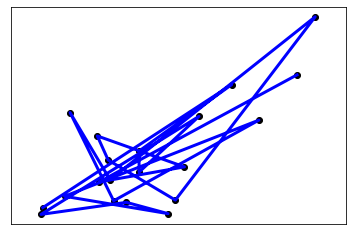

In [37]:
plt.scatter(diabetes_X_test,diabetes_y_test,color='black')
plt.plot(diabetes_X_test,diabetes_y_test,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

9.3 dummy estimator(不需要输入自变量):

首先是DummyClassifier

straified(分层):通过尊重训练集类别分布，分层生成随机预测

most_frequent:预测时返回出现最多的那一类

prior:总是预测类的排序

uniform:随机产生预测

constant:预测用户提供的常数label

然后是DummyRegressor,有mean,median,quantile等方法

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X,y=load_iris(return_X_y=True)
y[y!=1]=-1#只分为两类
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

###comparetheaccuracyofSVCandmost_frequent
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
clf = SVC(kernel='linear',C=1).fit(X_train,y_train)
#C是目标函数中松弛因子的惩罚系数值。
clf.score(X_test,y_test)

0.631578947368421

In [39]:
###change the kernel
clf=SVC(kernel='rbf',C=1).fit(X_train,y_train)
clf.score(X_test,y_test)#rbf表示径向基核函数

0.9473684210526315

In [40]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5789473684210527

10. 无监督学习：无y值
高斯混合模型；聚类；density估计；神经网络

In [41]:
#例子1-k均值聚类
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
kmeans.predict([[0, 0], [12, 3]])
print(kmeans.cluster_centers_)


[1 1 1 0 0 0]
[[10.  2.]
 [ 1.  2.]]


In [42]:
#例子2
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)
x=iris.data
y=iris.target
estimators=[('k_means_iris_8', KMeans(n_clusters=8)),('k_means_iris_3', KMeans(n_clusters=3)),('k_means_iris_bad_init', KMeans(n_clusters=3,n_init=1, init='random'))]
#init:用于指定初始的簇中心设置方法，如果为'k-means++',则表示设置的初始簇中心之间相距较远；如果为'random'，则表示从数据集中随机挑选k个样本作为初始簇中心；如果为数组则表示相应的簇中心。
#n_init用于指定算法运行次数，每次运行都会选择不同的初始簇中心

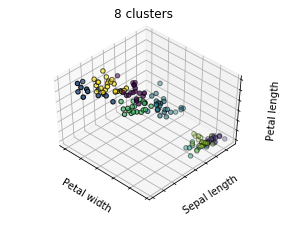

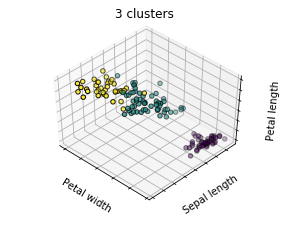

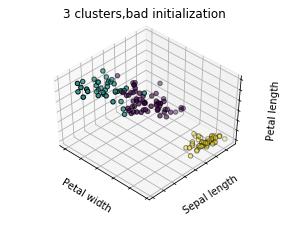

In [43]:
fignum=1
titles=['8 clusters','3 clusters','3 clusters,bad initialization']
for name,est in estimators:
    fig=plt.figure(fignum,figsize=(4,3))
    ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
    est.fit(x)
    labels=est.labels_

    ax.scatter(x[:,3],x[:,0],x[:,2],c=labels.astype(np.float),edgecolors='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


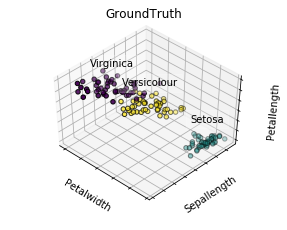

In [44]:
fig=plt.figure(fignum,figsize=(4,3))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
for name,label in [('Setosa',0),('Versicolour',1),('Virginica',2)]:
    ax.text3D(x[y == label, 3].mean(),x[y == label, 0].mean(),x[y == label, 2].mean() + 2, name,horizontalalignment='center',bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petalwidth')
ax.set_ylabel('Sepallength')
ax.set_zlabel('Petallength')
ax.set_title('GroundTruth')
ax.dist = 12
fig.show()


在机器学习任务中，拿到数据后，我们首先会将原始数据集分为三部分：训练集，验证集和测试集。训练集用于训练模型，验证集用于模型的参数选择配置，测试集对于模型来说是未知数据，用于评估模型的泛化能力。

验证集的必要性：在评估不同的设置（“超参数”）预评估器（例如必须为SVM手动设置的C设置）时，仍然存在测试集过拟合的风险，因为可以对参数进行调整，直到估计器达到最佳性能为止。

验证数据集可用于通过提前停止进行正则化：当验证数据集的错误增加时停止训练，因为这是过度拟合训练数据集的标志。

验证数据集起混合作用：它是测试使用的训练数据，但既不是低层训练的一部分，也不是最终测试的一部分。

验证数据集还可以在其他形式的模型准备中发挥作用，例如特征选择。

训练集的模型拟合包括利用相应的迭代算法进行变量选择和最优参数选择。

在k-fold交叉验证中，验证集和测试集不做区分,不用保留验证集。可以
在k-fold直接利用训练集做调参。

伪代码
data=...
train,validation,test=split(data)
#调参
parameters=...
for params in parameters:
    model=fit(train,params)
    skill=evaluate(model,validation)

#评估模型
model=fit(train)
skill=evaluate(model,test)

11.模型持久性--训练过的模型可以保存下来以后使用

In [45]:
from sklearn import svm
from sklearn import datasets
clf=svm.SVC()
X,y=datasets.load_iris(return_X_y=True)
clf.fit(X,y)
#方法一：用pickle
import pickle
s=pickle.dumps(clf)
clf2=pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [46]:
#方法二：joblib比pickle更有效率，尤其是对于有大量数据集的对象。
from joblib import dump,load
dump(clf,'filename.joblib')#转储
clf=load('filename.joblib')#加载

12.Validation curves(验证曲线):score的可视化(各种曲线)

通常我们通过选择算法和设置超参数来使得bais和variance尽可能的低。

The bias of an estimator is its average error for different trainingsets。

欠拟合(underfiting)有高的bias
过拟合(overfiting)有高的variance,对训练集有很高的敏感性。

以超参数为横轴，训练集分数和验证集分数为数轴作图，分析估计器是欠拟合还是过拟合。用函数'validation_curve'实现。

如果训练集SCORE和验证集SCORE都是低的，表示欠拟合。
如果训练集SCORE是高的，验证集是地的，表示过拟合。

In [47]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

validation_curve(estimator, X, y, param_name, param_range, groups=None, cv='warn', scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score='raise-deprecating')

In [48]:
np.random.seed(0)
X,y=load_iris(return_X_y=True)
indices=np.arange(y.shape[0])
np.random.shuffle(indices)#把顺序打乱
X,y=X[indices],y[indices]
train_scores,valid_scores=validation_curve(Ridge(),X,y,'alpha',np.logspace(-7,3,3),cv=5)
print(train_scores)
print(valid_scores)

[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.9340217  0.94366412 0.92648377 0.91933304 0.929225  ]
 [0.51143526 0.52415737 0.49868907 0.47086988 0.49623503]]
[[0.9055033  0.84185935 0.94569793 0.96231017 0.93366144]
 [0.90550088 0.84184574 0.94568969 0.96233172 0.93366806]
 [0.46706558 0.25698974 0.50496293 0.49826404 0.52500014]]


13.学习曲线

显示的是随着训练集样本数的变化，验证集SCORE和训练集SCORE的变化。可以用learning_curve

所需的数据是：已使用的样本数量，训练集的平均分数和验证集的平均分数。

如果训练集分数和测试集分数随着样本容量增大，收敛于一个低值，则增加样本不会有太大效果。

如果训练集分数大于测试集分数，增加更多训练集会增加模型的泛化能力。

learning_curve(estimator, X, y, groups=None, train_sizes=np.linspace(0.1,1.0,5), cv='warn', scoring=None, exploit_incremental_learning=False, n_jobs=None, pre_dispatch='all', verbose=0, shuffle=False, random_state=None, error_score='raise-deprecating')

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
train_sizes,train_scores,valid_scores=learning_curve(SVC(kernel='linear'),X,y,train_sizes=[50,80,110],cv=5)

train_sizes
train_scores
valid_scores

array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])

14.审查和可视化

预测performance是机器学习的主要目标，然而，用评估指标来概括性能通常是不够的：它假设评估指标和测试数据集完美地反映了目标域，这很少是真的。

在某些领域中，模型在部署之前需要具有一定程度的可解释性。
需要对表现出性能问题的模型进行调试，以了解模型的根本问题。sklearn.inspection模块提供了有助于理解模型预测和影响预测因素的工具。
可以用来评估模型的假设和偏差，设计更好的模型或诊断模型性能问题。

审查

14.1 Partial dependence plots

部分依赖图（PDP）显示目标响应与一组“目标”功能之间的依赖关系，在所有其他功能（“互补”功能）的值上处于边际位置。（相当于多元回归中的回归系数） 直观地讲，我们可以将部分依赖关系解释为响应变量与因变量的函数。

sklearn.inspection模块提供了函数plot_partial_dependence来创建 one-way和two-way部分依赖图。

14.2 Permutation feature importance(排列特征的重要性)

排列特征的重要性定义为当随机改变单个特征值时模型得分的降低。这对于非线性或不透明的估计量特别有用。该技术得益于模型不可知性，可以根据特征的不同排列多次计算。permutation_importance 函数能够计算特征重要性。

14.3 可视化：Scikit-learn为机器学习可视化定义了API，API的特征就是作图快速，可视化调整不用重新计算。

roc_curve是在选取不同的SCORE,计算对应的sensitivity和specificity

sensitivity表示正确预测的正例数在实际正例中的比例

specificity表示正确预测的负例数在实际负例数中的比例。

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine

In [51]:
X,y=load_wine(return_X_y=True)
y=y==2

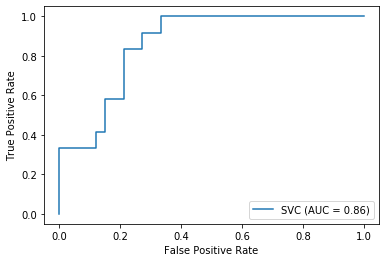

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
svc=SVC(random_state=42)
svc.fit(X_train,y_train)
svc_disp=plot_roc_curve(svc,X_test,y_test)

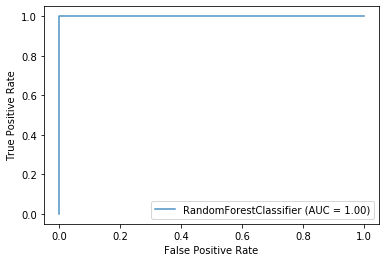

In [53]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
ax=plt.gca()#给出当前fifure的matplot.axes.AXES实例
rfc_disp=plot_roc_curve(rfc,X_test,y_test,ax=ax,alpha=0.8)#若ax=none，则会自动create figure and axes

15. 数据集转换

scikit-learn提供了一个转换器库，可以清理（请参见预处理数据），缩小（请参见无监督的降维），展开（请参见内核近似）或生成（请参见特征提取）特征表示。

它同estimator一样，有fit方法，从训练集中learn模型参数，并且用transform方法将模型应用到unseen data

transformer通常与classifiers、regressor或其他的估计器结合在一起组成composite estimator

15.1 piplines and composite estimators

pipline是最常见的组合估计器。

pipline通常与FeatureUnion结合使用，FeatureUnion将transformer的输出连接到一个复合特征空间中。

TransformedTargetRegressor转换target

piplines仅转换observed data,即X

piplines能够融合多个estimators，对于有固定步骤处理数据的情况（例如特征选择、正则化和分类）是非常有用的。

piplines中的estimators,除了最后一个，必须是transformers即有transform方法，最后一个不受限制，可以是transforms，也可以是classifier等。

pipline的方法和最后一个estimator的方法一样，如果最后一个estimator是classifier，则pipline can be uesd as a classifier

pipline能够对estimator的所有参数进行一次性网格搜索；并且能够确保使用相同的数据训练transformer和predictors

15.1.1 管道构建例子——使用一个(key,value)的list或者make_pipline

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA#主成分分析
estimators=[('reduce_dim',PCA()),('clf',SVC())]
pipe=Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(),MultinomialNB())

Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

15.1.2 pipe是list,可以通过index或name访问,或用切片方法
pipe中参数设置方法

In [56]:
pipe[0]
pipe['reduce_dim']
pipe[:1]
pipe[-1:]
#pipe中参数设置方法：<estimator>__<parameter>
pipe.set_params(clf__C=10)

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid=dict(reduce_dim__n_components=[2,5,10],clf__C=[0.1,10,100])
grid_search=GridSearchCV(pipe,param_grid=param_grid)

15.1.3 缓存 transformers: 避免重复计算

安装transformer可能在计算上很昂贵。 通过设置其memory参数集，Pipeline将在调用fit之后缓存每个转换器。

此功能用于避免在参数和输入数据相同的情况下计算管道中的fit transfomers。

一个典型示例是在网格搜索中，其中包含transformer只能被拟合一次，并可以重复用于每种配置。

参数memory能缓存transformer,memory可以是包含字典的string或者是joblib.Memory对象

In [58]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
cachedir=mkdtemp()
pipe=Pipeline(estimators,memory=cachedir)
pipe

Pipeline(memory='C:\\Users\\LENOVO\\AppData\\Local\\Temp\\tmph65tkwcp',
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [59]:
#Clear the cache directory when you don't need it anymore
rmtree(cachedir)

15.1.4 在回归中转换target

compose.TransformedTargetRegressor在拟合模型之前将y转换；通过inverse transfrom 将预测值转换回original space;通过在回归预测中的一个arguement设置,就可实现以上回转的变换。

In [60]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
X,y=load_boston(return_X_y=True)
transformer=QuantileTransformer(output_distribution='normal')
regressor=LinearRegression()
regr=TransformedTargetRegressor(regressor=regressor,transformer=transformer)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
regr.fit(X_train,y_train)
print('R2 score:{0:.2f}'.format(regr.score(X_test,y_test)))
raw_target_regr=LinearRegression().fit(X_train,y_train)
print('R2 score:{0:2f}'.format(raw_target_regr.score(X_test,y_test)))

R2 score:0.67
R2 score:0.635464
C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (379). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


15.1.5 FeatureUnion:composite feature spaces

FeatureUnion：

将几个transfromers结合在一起，在拟合模型时，每个transformer独立fiting,使用目的和pipline一样,并且FeatureUnion和Pipeline能够结合在一起组成更复杂的model

用法：

a list of(key,value),key是转换器name,value是estimator;也可以使用make_union构造。用set_params设置参数

15.1.6 对于异构数据的列转换--scikit-learn

对于不同的数据需要做不同的预处理。ColumnTransformer能够对数据的不同列做不同的transform。ColumnTransformer的作用对象是数组，稀疏矩阵以及pandas数据框。

make_column_transformer函数能够创建一个ColumnTransformer对象，名字会自动给。




In [62]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC


class TextStats(TransformerMixin, BaseEstimator):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        return [{'length': len(text),
                 'num_sentences': text.count('.')}
                for text in posts]


class SubjectBodyExtractor(TransformerMixin, BaseEstimator):
    """Extract the subject & body from a usenet post in a single pass.

    Takes a sequence of strings and produces a dict of sequences.  Keys are
    `subject` and `body`.
    """
    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        # construct object dtype array with two columns
        # first column = 'subject' and second column = 'body'
        features = np.empty(shape=(len(posts), 2), dtype=object)
        for i, text in enumerate(posts):
            headers, _, bod = text.partition('\n\n')
            features[i, 1] = bod

            prefix = 'Subject:'
            sub = ''
            for line in headers.split('\n'):
                if line.startswith(prefix):
                    sub = line[len(prefix):]
                    break
            features[i, 0] = sub

        return features


pipeline = Pipeline([
    # Extract the subject & body
    ('subjectbody', SubjectBodyExtractor()),

    # Use ColumnTransformer to combine the features from subject and body
    ('union', ColumnTransformer(
        [
            # Pulling features from the post's subject line (first column)
            ('subject', TfidfVectorizer(min_df=50), 0),

            # Pipeline for standard bag-of-words model for body (second column)
            ('body_bow', Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ]), 1),

            # Pipeline for pulling ad hoc features from post's body
            ('body_stats', Pipeline([
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ]), 1),
        ],

        # weight components in ColumnTransformer
        transformer_weights={
            'subject': 0.8,
            'body_bow': 0.5,
            'body_stats': 1.0,
        }
    )),

    # Use a SVC classifier on the combined features
    ('svc', LinearSVC(dual=False)),
], verbose=True)

# limit the list of categories to make running this example faster.
categories = ['alt.atheism', 'talk.religion.misc']
X_train, y_train = fetch_20newsgroups(random_state=1,
                                      subset='train',
                                      categories=categories,
                                      remove=('footers', 'quotes'),
                                      return_X_y=True)
X_test, y_test = fetch_20newsgroups(random_state=1,
                                    subset='test',
                                    categories=categories,
                                    remove=('footers', 'quotes'),
                                    return_X_y=True)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

[Pipeline] ....... (step 1 of 3) Processing subjectbody, total=   0.0s
[Pipeline] ............. (step 2 of 3) Processing union, total=   0.5s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.0s
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       319
           1       0.67      0.74      0.70       251

    accuracy                           0.72       570
   macro avg       0.72      0.72      0.72       570
weighted avg       0.73      0.72      0.72       570



Column Transformer with Mixed Types

In [63]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#sklearn.impute.SimpleImputer是缺失值插补函数
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Load data from https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
#X.isnull().sum()发现有大量缺失值，用中位数补全缺失值
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#表示分类变量中的缺失值全部用missing替代，而在独热化处理时，将missing也看作一类.handle_unknown表示在转换时若遇到未知分类，，将其全部编码为0
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.790


In [64]:
import pandas as pd

X.iloc[284,:]
E=X.loc[:,['embarked']].values
value=pd.DataFrame(categorical_transformer.fit_transform(E).toarray())
(value.iloc[:,3])[value.iloc[:,3]==1]
imputer=SimpleImputer(strategy='constant', fill_value='missing')
E=pd.DataFrame(imputer.fit_transform(E))
E[0].value_counts()#一维序列才有value_counts()方法
type(E[0])
E[0].shape
(value.iloc[:,3]==1).sum()


2

In [65]:
#E=X.loc[:,['embarked']].values
onehot=OneHotEncoder(handle_unknown='ignore')
#value=onehot.fit_transform(E).toarray()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
onehot.fit(X)
onehot.categories_
onehot.transform(X).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

15.2 特征提取

特征提取与特征选择有很大不同：前者是将文本或图像等任意数据转换为可用于机器学习的数值特征。后者是应用于这些特征的机器学习技术

15.2.1 loading 特征 from dicts

DictVectorizer类可用于将表示为标准Python dict对象 列表的要素数组转换为scikit-learn估计器使用的NumPy / SciPy表示形式。

当对处理速度无要求时，dict使用起来更方便

DictVectorizer为分类（又称名义，离散）特征实现所谓的one-of-k编码或“one-hot”编码。

分类特征是“属性-值”对，其中值被限制在可能性的离散列表中而无须排序 （例如主题标识符，对象类型，标签，名称...）

In [66]:
measurements=[{'city':'Dubai','temperature':33},{'city':'London','temperature':12},{'city':'San Francisco','temperature':18}]

from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
print(vec.fit_transform(measurements).toarray())
#DictVectorizer为分类（又称名义，离散）特征实现“one-hot”编码。
print(vec.get_feature_names())

[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 12.]
 [ 0.  0.  1. 18.]]
['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']


15.2.2 text feature extraction

在数学中，bag(mset）是对集合概念的修改，与集合不同的是，集合的每个元素都可以有多个实例。 为每个元素提供的实例的个数称为该元素在多重集中的多重性

停用词是指诸如“和”，“该”，“他”之类的词，它们被认为在表示文本内容方面没有提供任何信息，可以将其删除以避免将其理解为预测的信号。 2然而，有时候，类似的单词对于预测很有用，例如在对写作风格或性格进行分类时。 3注意选择停用词列表。 流行的停用词列表可能包含对某些任务（例如计算机）具有高度信息意义的词。 4您还应确保对停用词列表进行的预处理和标记化与在矢量化程序中使用的预处理和标记化相同。

15.2.3 image feature extraction

15.3 Preprocessing data

将数据转换为适用于模型构建的形式。并且如果数据集有异常值，robust scalers或者transformers会更合适。具体方法见5

15.4 imputation of missing values缺失值的估算

缺失值可能是：blank空白，NaN空值或其他占位符等，但scikit-learn的估计器假定所有的值都是数值型。

15.4.1 Univariate vs. Multivariate Imputation

impute.SimpleImputer仅根据缺失值所在变量的非缺失值进行推算；当strategy为'most_frequent'或'constant'时,可以支持用'string values'表示的分类数据或 pandas categorical

impute.IterativeImputer根据整个数据集来估计缺失值。

In [67]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit([[1,2],[np.nan,3],[7,6]])

X=[[np.nan,2],[6,np.nan],[7,6]]
print(imp.transform(X))
#imp.fit([[1,2],[np.nan,3],[7,6]])计算得到平均值为[4,3.6],然后用这两个平均值去填补X中的缺失值。

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [68]:
import pandas as pd
df=pd.DataFrame([['a','x'],[np.nan,'y'],['a',np.nan],['b','y']],dtype='category')
imp=SimpleImputer(strategy='most_frequent')
print(imp.fit_transform(df))
df

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


Multivariate feature imputation
有缺失值的特征将作为其他特征的函数，缺失值特征为y,其他特征为X，通过回归，利用已知数据去预测缺失值以达到填补的目的。针对每个特征以迭代循环方式完成此操作，然后重复max_iter插补回合中重复此操作。 返回最后一轮估算的结果。也就是说在预测缺失值时要计算很多轮，要达到一定的标准，这样提高填补精度。

In [69]:
#注意先导入enable_iterative_imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp_fit=imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
print(np.round(imp.transform(X_test)))
#为了支持归纳模式下的插补，我们在``fit''阶段存储每个要素的估计量，并在``transform''阶段进行预测而无需重新拟合（按顺序）。

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


15.4.2 单次与多次插补

在统计学界，通常的做法是执行多次计算，例如，为单个特征矩阵生成m个单独的计算。然后，每一个m的估算都通过后续的分析pipline(例如，特征工程、聚类、回归、分类)进行。m个最终分析结果(例如，延迟验证错误)允许数据科学家了解由于缺失值所导致的固有不确定性，分析结果可能会有何不同。上述做法称为多重插补。


实现IterativeImputer的灵感来自于R的MICE包[1]，但与之不同的是，我们返回了一个单一的插补，而不是多个插补。然而，当sample_posterior=True时，IterativeImputer也可以通过重复应用于具有不同随机种子的同一数据集来进行多次计算。
当用户对由于缺失值而导致的测量不确定性不感兴趣时，单次和多次插补在预测和分类上下文中有多大用处，这仍然是一个有待解决的问题。

15.4.3 Nearest neighbors imputation

KNN Imputer类提供了使用k最近邻方法填充缺失值的插补。
默认情况下，支持缺失值nan_euclidean_distances的欧几里得距离度量标准用于查找最近的邻居。
使用n_neighbors个具有该特征值的最近邻居的值来估算每个缺失的特征。
邻居的特征被均匀平均或通过到每个邻居的距离加权。
如果一个样本缺少多个特征，则该样本的邻居可能会有所不同，具体取决于所插补的特定特征

In [70]:
#以下代码段演示了如何使用具有缺失值的样本的两个最近邻居的平均特征值替换编码为asnp.nan的缺失值：
import numpy as np
from sklearn.impute import KNNImputer
nan=np.nan
X=[[1,2,nan],[3,4,3],[nan,6,5],[8,8,7]]
imputer=KNNImputer(n_neighbors=2,weights='uniform')
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

15.4.4 Marking imputed values 标记缺失值

MissingIndicator转换器用于将数据集转换为相应的二进制矩阵，以指示数据集中缺失值的存在。这个变换与imputation结合起来是有用的。当使用插补时，保存关于哪些值丢失的信息可以提供有用的信息。

SimpleImputer与IterativeImputer中可通过设置参数add_indicator为True，使结果中保存有MissingIndicator的转换结果。

NaN通常用作缺少值的占位符。但是，它强制数据类型为浮点数。参数missing_values允许指定其他占位符，如整数。 在以下示例中，我们将使用-1作为缺失值。

参数features用于选择构造掩码的特征。默认情况下，它是 'missing-only',在fit时返回包含缺失值的特征的输入掩码.
也就是说只返回包含缺失值的特征的识别结果，以下例子中第三列特征不包含缺失值，所以transform中没有该特征的识别结果，transform返回结果只有三列，而不是四列。

In [71]:
from sklearn.impute import MissingIndicator
X=np.array([[-1,-1,1,3],[4,-1,0,-1],[8,-1,1,0]])
indicator=MissingIndicator(missing_values=-1)
mask_missing_values_only=indicator.fit_transform(X)
mask_missing_values_only
indicator.features_

array([0, 1, 3], dtype=int64)

15.5 Unsupervised dimensionality reduction

如果数据集特征数特别多，用一个Unsupervised dimensionality reduction对于减少特征数是很有帮助的。具体有PCA主成分分析；random projection模块,以及应用cluster.FeatureAgglomeration实现分层聚类，将行为相似的特征分组在一起。

15.6 sklearn.random_projection

sklearn.random_projection是一个简单且计算简洁的降维module,用更快的运行速度，更少的样本量来达到预定的精度。

该模块实现两种非结构化随机矩阵：高斯随机矩阵和稀疏随机矩阵。
控制随机投影矩阵的维度和分布，以保留数据集的任何两个样本之间的成对距离。 因此，随机投影是基于距离的方法的合适的近似技术。



15.6.1 Gaussian random projection

假如当前有一个n*d的数据集，d是非常非常大，现在想要降维数据集至n*k,k是2到10范围内的数。对于高斯random projection,创建一个映射矩阵R,其维度是d*k.并且$R_{ij}\sim N(0,1)$独立同分布。

$Y=\frac{1}{\sqrt k} XR$,通过将数据集矩阵与投影矩阵相乘，得到的Y是n*k的维度，$\frac{1}{\sqrt k}$能够确保现有的低维空间中的两点的欧几里得距离与原先高维空间中同样两点欧几里得距离是高度近似的。

sklearn.random_projection.GaussianRandomProjection通过将原始数据映射到一个随机产生的矩阵达到降维目的。高斯随机矩阵由
$N(0,\frac{1}{n_{components}})$产生。

In [72]:
import numpy as np
from sklearn import random_projection
X=np.random.rand(100,10000)
transformer=random_projection.GaussianRandomProjection()
X_new=transformer.fit_transform(X)
X_new.shape

(100, 3947)

15.7 其他数据集转换方法

15.7.1 Kernel Approximation核近似

这个submodule包含一些核工具，如支持向量机中的核函数。

15.7.2 Pairwise metrics,Affinities and Kernels

sklearn.metrics.pairwise子模块实现了实用程序来评估成对的距离或样本集的亲和力

16.数据集导入--从别处下载/导入，或者自己生成(sklearn.datasets)

sklearn.datasets程序包嵌入了一些小的玩具数据集(load)。
该程序包还具有帮助程序来获取机器学习社区常用的较大数据集，以对来自“现实世界”的数据进行算法基准测试的功能(fetch)。
评估数据规模的影响（n_samples和n_features），同时控制数据的统计属性（通常是特征的相关性和信息性），也可以生成综合数据

16.1 General dataset API

无论是fetch大数据，还是load小数据，返回的都是字典对象，至少2个items,一个是n\_samples*n\_features的数组，另一个是keys.除此以外也返回包含长度为n\_samples的target，且具有key'target'

通过设置return_X_y参数可以以元组方式获得data和target.

the dataset generation functions：

Toy datasets--load_boston()

Real world datasets--fetch_20newsgroup

数据集生成功能。 它们可用于生成受控的合成数据集，如“生成的数据集”部分所述。这个函数返回一个tuple(X,y)，X是n_samples*n_features的数组，y是长度为n_samples的数组。

16.2 Generators for classification and clustering

scikit-learn有生成器，可以产生固定规模和复杂度的人工数据集。

Single label：make_blobs和make_classification都通过为每个类分配一个或多个的正态分布簇来创建多类数据集。
Multilabel：make_multilabel_classification生成带有多个标签的随机样本，反映出从主题混合中提取的一袋单词。

16.2.1 make_blobs

scikit中的make_blobs方法常被用来生成聚类算法的测试数据，直观地说，make_blobs会根据用户指定的特征数量，中心点数量，范围等来生成几类数据，这些数据可用于测试聚类算法的效果。

sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True,
 random_state=None)

n_samples表示产生多少个数据;n_features表示数据是几维;centers表示数据点中心，可以输入int数字，代表有多少个中心，也可以输入几个坐标（fixed center locations）
cluster_std表示分布的标准差

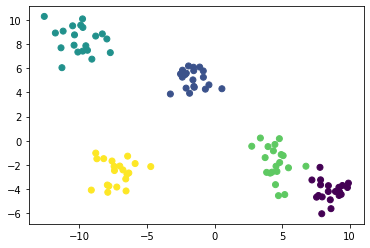

In [5]:
#例子（生成三类数据用于聚类（100个样本，每个样本2个特征））：
from sklearn.datasets import make_blobs
from matplotlib import pyplot

data,label=make_blobs(n_samples=100,n_features=2,centers=5)

pyplot.scatter(data[:,0],data[:,1],c=label)
pyplot.show()

In [ ]:
#为每个类别设置不同的方差，只需要在上述代码中加入cluster_std参数


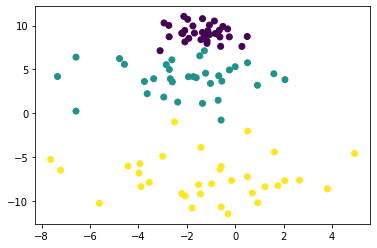

In [8]:
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
n_features=2

data,target=make_blobs(n_samples=100,n_features=2,centers=3,cluster_std=[1.0,2.0,3.0])

plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

16.2.2 sklearn.datasets.make_classification来生成数据，通常用于分类算法。

sklearn.datasets.make_classification(n_samples=100, n_features=20, 
n_informative=2, n_redundant=2,n_repeated=0, n_classes=2, 
n_clusters_per_class=2, weights=None,flip_y=0.01, class_sep=1.0,
 hypercube=True,shift=0.0, scale=1.0, shuffle=True, random_state=None)

输入：n_features :特征个数= n_informative（） + n_redundant + n_repeated

n_informative:多信息特征的个数.每个类均由多个高斯簇组成，每个高斯簇都位于维度``n_informative''的子空间中超立方体的顶点周围。 对于每个簇，信息特征从N(0,1)分布中独立抽取，然后在每个聚类中随机线性组合以增加协方差。 然后将簇放置在超立方体的顶点上。

n_redundant:冗余信息，informative特征的随机线性组合

n_repeated:复制随即提取自n_informative和n_redundant的特征 

n_classes:分类类别

n_clusters_per_class:某一个类别是由几个cluster构成的

In [13]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=10,n_informative=4,n_redundant=3,n_repeated=3,n_classes=3)
X.shape

(100, 10)

16.2.3 make_regression

make_regression产生的回归目标是随机特征的可选稀疏随机线性组合，带有噪声。其信息特征可能不相关或相关性较高（很少特征可解释大部分差异）

16.3 loading other datasets

loading datasets from others the openml.org repository
或者scikit-learn includes utility functions for loading datasets in thesvmlight/libsvm format.

In [15]:
import numpy as np
from sklearn.datasets import fetch_openml
mice=fetch_openml(name='miceprotein',version=4)
#在定义一个数据集时需要提供name和version
print(mice.data.shape)
print(mice.target.shape)
print(mice.DESCR)#看数据集描述

(1080, 77)
(1080,)
**Author**: Clara Higuera, Katheleen J. Gardiner, Krzysztof J. Cios  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) - 2015   
**Please cite**: Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 5

16.4 loading from external datasets

scikit-learn的工作对象时array或scipy sparse matrices,像pandas.dataframe能转换为array，因此也是可以接受的。因此有一些方法能下载format的数据。

pandas.io提供了从CSV,Excel,JOSN,SQL中读取数据的工具。

scipy.io专门研究通常在科学计算环境中使用的二进制格式，例如.mat和.arff

numpy / routines.io用于将列式数据标准加载到numpy数组中

scikit-learn的datas.load_svmlight_file用于svmlight或libSVM稀疏格式

scikit-learn的datasets.load_files用于文本文件目录，其中每个目录的名称是每个类别的名称，每个目录内的每个文件对应于该类别中的一个样本

skimage.io或者Imageio 用于loading图片和音频数据into numpy array

scipy.io.wavfile.read 用于将WAV文件读取成numpy array


